   Channel  Counts
0        0       0
1        1       0
2        2       0
3        3       0
4        4       0


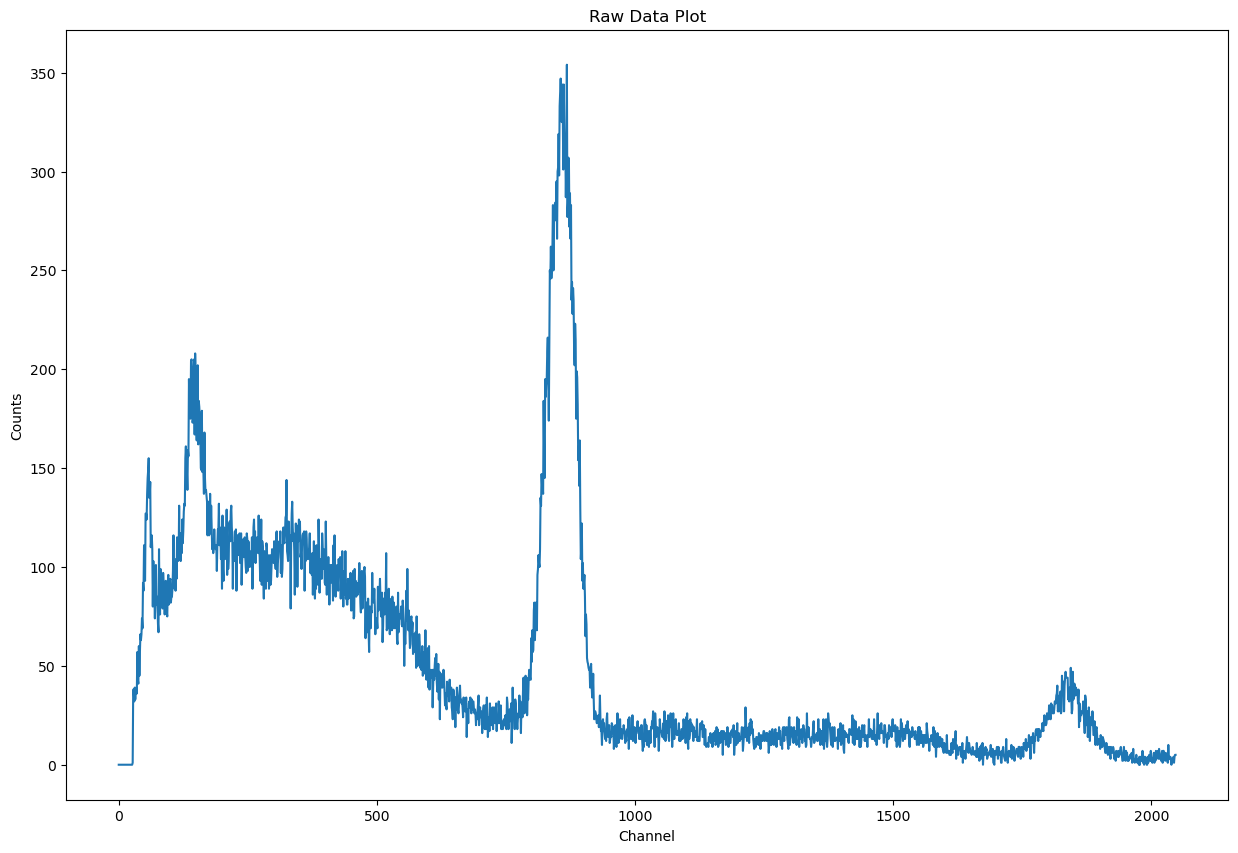

In [35]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class


##############
# Import data
##############

df_Na_22 = pd.read_csv("Na_22.csv") # create pandas dataframe
print(df_Na_22.head()) # print first 5 rows


##############
# Plot data
##############

x_Na_22 = df_Na_22["Channel"] # grab column
y_Na_22 = df_Na_22["Counts"] # grab column
x_Na_22_mp = df_Na_22["Channel"][1600:] # grab column for mp = mini peak
y_Na_22_mp = df_Na_22["Counts"][1600:] # grab column for mp = mini peak
plt.figure(figsize=(15,10))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Raw Data Plot")
plt.plot(x_Na_22, y_Na_22)
plt.show()

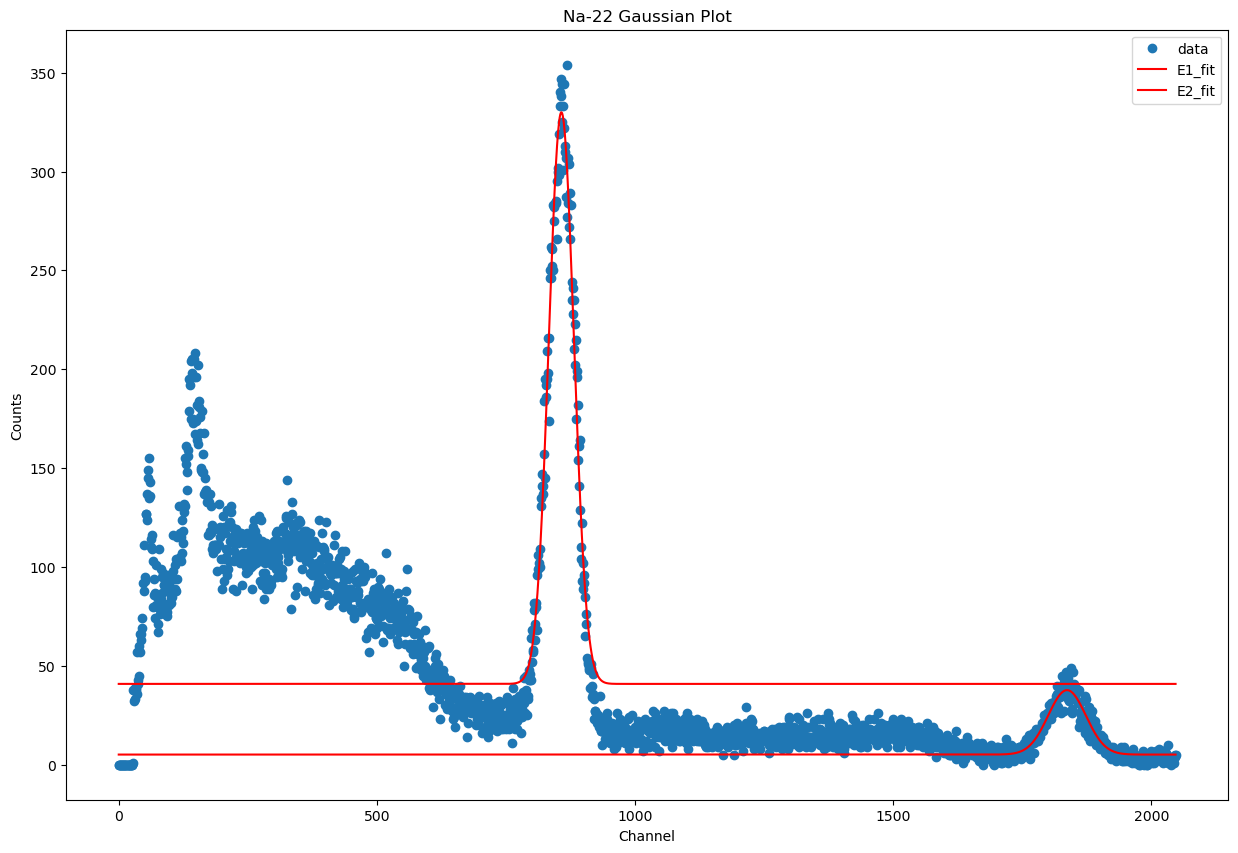

In [38]:
################################
# Define the Gaussian function
# takes in constants, solves 
# equation, returns value
################################

def gaus(x, a, mean, sigma, h):
    fit = a*np.exp((-(x-mean)**2)/(2*sigma**2)) + h
    return fit


#####################
# Fit the data using
# curve fit class
#####################

popt_Na_22_e1, pcov_Na_22_e1 = curve_fit(gaus, x_Na_22, y_Na_22, p0=[a:=350, mean:=900, sigma:=20, h:=20]) # solves for a, mean, sigma, h
y_Na_22_fit_e1 = gaus(x_Na_22, *popt_Na_22_e1) # creates y(x) = gaus function with fitted values

popt_Na_22_e2, pcov_Na_22_e2 = curve_fit(gaus, x_Na_22_mp, y_Na_22_mp, p0=[a:=31, mean:=1837, sigma:=33, h:=8]) # solves for a, mean, sigma, h
y_Na_22_fit_e2 = gaus(x_Na_22, *popt_Na_22_e2) # creates y(x) = gaus function with fitted values


#################
# Plot Fit Curve
#################

plt.figure(figsize=(15,10))
plt.plot(x_Na_22, y_Na_22, 'o', label="data")
plt.plot(x_Na_22, y_Na_22_fit_e1, 'r-', label='E1_fit')
plt.plot(x_Na_22, y_Na_22_fit_e2, 'r-', label='E2_fit')
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Na-22 Gaussian Plot")
plt.legend()
plt.show()

In [41]:
#####################
# Print fit data
# Print uncertainty
#####################

print("Fit Amplitude, Na-22-E1: ", popt_Na_22_e1[0],
      "\n Fit Mean, Na-22-E1: ", popt_Na_22_e1[1],
      "\n Fit Sigma, Na-22-E1: ", popt_Na_22_e1[2],
      "\n Fit Height, Na-22-E1: ", popt_Na_22_e1[3])

print("\n Uncertainty matrix, Na-22-E1: \n", pcov_Na_22_e1)

print("\n Fit Amplitude, Na-22-E2: ", popt_Na_22_e2[0],
      "\n Fit Mean, Na-22-E2: ", popt_Na_22_e2[1],
      "\n Fit Sigma, Na-22-E2: ", popt_Na_22_e2[2],
      "\n Fit Height, Na-22-E2: ", popt_Na_22_e2[3])

print("\n Uncertainty matrix, Na-22-E2: \n", pcov_Na_22_e2)

Fit Amplitude, Na-22-E1:  289.10697065916565 
 Fit Mean, Na-22-E1:  857.3752558261165 
 Fit Sigma, Na-22-E1:  -24.15974073243508 
 Fit Height, Na-22-E1:  40.873939929448284

 Uncertainty matrix, Na-22-E1: 
 [[ 6.02965583e+01  1.76248660e-06  3.25953961e+00 -6.29352493e-01]
 [ 1.76248660e-06  5.57125064e-01  1.47422385e-07  4.29644563e-10]
 [ 3.25953961e+00  1.47422385e-07  5.69552385e-01  1.05170334e-01]
 [-6.29352493e-01  4.29644563e-10  1.05170334e-01  8.90038799e-01]]

 Fit Amplitude, Na-22-E2:  32.58526107341403 
 Fit Mean, Na-22-E2:  1836.76604095419 
 Fit Sigma, Na-22-E2:  36.47681607012738 
 Fit Height, Na-22-E2:  5.135279384316344

 Uncertainty matrix, Na-22-E2: 
 [[ 3.18164592e-01  1.61908090e-07 -1.63169564e-01 -3.51860875e-02]
 [ 1.61908090e-07  4.90022375e-01 -1.89728844e-07  3.43538692e-09]
 [-1.63169564e-01 -1.89728844e-07  6.14733158e-01 -7.87761846e-02]
 [-3.51860875e-02  3.43538692e-09 -7.87761846e-02  4.97606286e-02]]
